## Data Transformation and Feature Engineering

1. Data Transformation: Feature Scaling
2. Categorical Data Encoding and Feature Engineering
3. Outlier Detection and Treatment
4. Data Aggregation and Merging

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Data\Housing.csv')

df.head()

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\HP\AppData\Local\Temp\ipykernel_14820\4223663724.py:1: SyntaxWarning: invalid escape sequence '\H'
  df = pd.read_csv('Data\Housing.csv')


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Observations
- Numerical Features: `price`, `area`, `bedrooms`, `bathrooms`, `stories`, `parking`
- Categorical Features: `mainroad`, `guestroom`, `basement`, `prefarea`,`furnishingstatus`
- No missing values

### Data Transformation: Feature Scaling

#### Min-Max Scaling
Rescales features to a fixed range (usually 0 to 1).

In [5]:
from sklearn.preprocessing import MinMaxScaler
num_features = ['price', 'area', 'bedrooms', 'stories','parking']
scaler = MinMaxScaler()
df[num_features]= scaler.fit_transform(df[num_features])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,2,0.666667,yes,no,no,no,yes,0.666667,yes,furnished
1,0.909091,0.502405,0.6,4,1.000000,yes,no,no,no,yes,1.000000,no,furnished
2,0.909091,0.571134,0.4,2,0.333333,yes,no,yes,no,no,0.666667,yes,semi-furnished
3,0.906061,0.402062,0.6,2,0.333333,yes,no,yes,no,yes,1.000000,yes,furnished
4,0.836364,0.396564,0.6,1,0.333333,yes,yes,yes,no,yes,0.666667,no,furnished


#### Standardization

Rescales data to have a mean of 0 and a standard deviation of 1.

In [6]:
from sklearn.preprocessing import StandardScaler
num_features = ['price', 'area', 'bedrooms','bathrooms', 'stories','parking']
scaler = StandardScaler()
df[num_features]=scaler.fit_transform(df[num_features])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,yes,no,no,no,yes,1.517692,yes,furnished
1,4.004484,1.757010,1.403419,5.405809,2.532024,yes,no,no,no,yes,2.679409,no,furnished
2,4.004484,2.218232,0.047278,1.421812,0.224410,yes,no,yes,no,no,1.517692,yes,semi-furnished
3,3.985755,1.083624,1.403419,1.421812,0.224410,yes,no,yes,no,yes,2.679409,yes,furnished
4,3.554979,1.046726,1.403419,-0.570187,0.224410,yes,yes,yes,no,yes,1.517692,no,furnished


### Categorical Data Encoding and Feature Engineering

Converting non-numeric data into numerical formats:
- One-Hot Encoding: Creates binary columns for each category.
- Label Encoding: Assigns each category a unique number (good for ordinal data).


In [7]:
from sklearn.preprocessing import LabelEncoder
cat_features =  ["mainroad", "guestroom", "basement", "hotwaterheating", 
                "airconditioning", "prefarea", "furnishingstatus"]
encoder = LabelEncoder()
for col in cat_features:
    df[col]=encoder.fit_transform(df[col])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    float64
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    float64
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 55.5 KB


### Outlier Detection & Treatment

In [9]:

from scipy import stats
import numpy as np


z_scores = stats.zscore(df[num_features].dropna())
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis =1)
house_df_no_outliers = df[filtered_entries]

print(f"Original data points: {len(df)}; After outlier removal: {len(house_df_no_outliers)}")


Original data points: 545; After outlier removal: 522


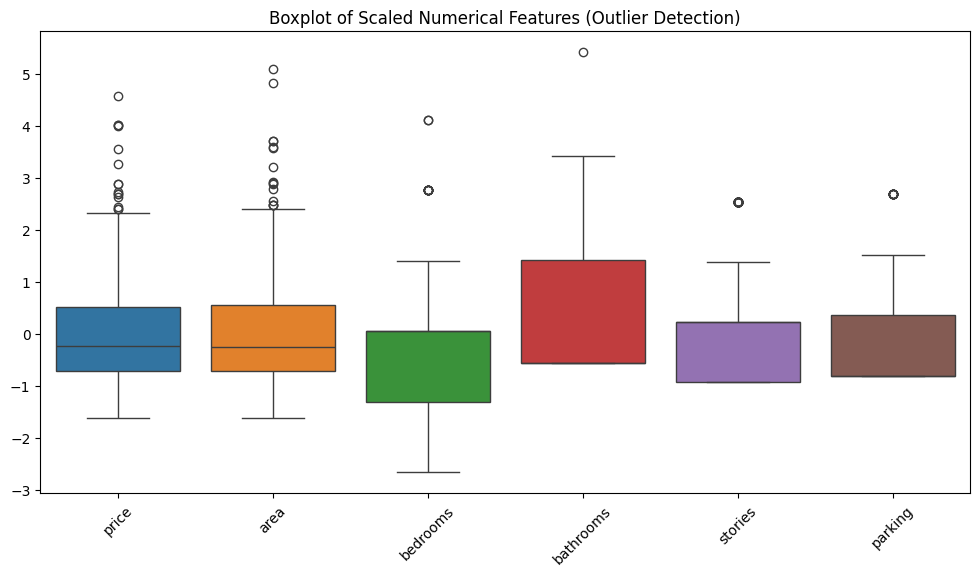

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_features])
plt.xticks(rotation=45)
plt.title("Boxplot of Scaled Numerical Features (Outlier Detection)")
plt.show()

#### Outlier treatment

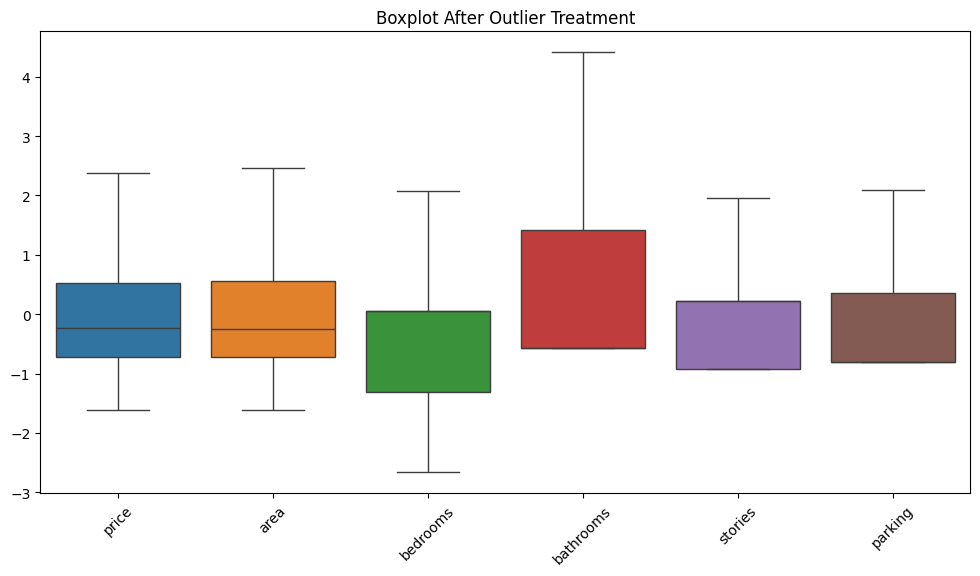

In [11]:
# Calculate lower and upper bounds for outlier treatment using IQR
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in num_features:
    df[col] = df[col].clip(lower_bound[col], upper_bound[col])

# Replot boxplot to confirm outliers are treated
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_features])
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier Treatment")
plt.show()

# Foundations of Statistics for ML

### Statistics and Probability are important for ML because
- Statistics help in understanding data, making inferences and building models
- Probability is the foundation of predictive modeling and uncertainty quantification.


**Population:** the entire set of entities of interest
**Sample:** A subset of population used for analysis
A sample has to be less than 30

**Descriptive vs Inferential Statistics**
- Description: summarized data(eg. mean, median, mode, standard deviation)
- Inferential: Make predictions or inferences about the population from the sample()

**Random Variables**
Random Variables are variables whose possible values are outcomes of a random phenomenon

- **Discete**: Takes countable values(number of heads in coin tosses)
- **Continous**: Takes uncountable values eg height

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
dfcopy = pd.read_csv("Data\Housing.csv")
dfcopy.head()

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\HP\AppData\Local\Temp\ipykernel_14820\1822500119.py:1: SyntaxWarning: invalid escape sequence '\H'
  dfcopy = pd.read_csv("Data\Housing.csv")


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
dfcopy.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [15]:
mean_price = dfcopy['price'].mean()
median_price = dfcopy['price'].median()
mode_price = dfcopy['price'].mode()

print(f"Mean: {mean_price} \nMedian: {median_price}\nMode: {mode_price}")

Mean: 4766729.247706422 
Median: 4340000.0
Mode: 0    3500000
1    4200000
Name: price, dtype: int64


- A large standard deviation shows that the data points are far away from the  mean
- The Standard deviation is used to find the distance between a data point and mean (X - SD)


In [16]:

var_price = dfcopy['price'].var()
std_price = dfcopy['price'].std()

print(f"Variance: {var_price} \nStandard Deviation: {std_price}")

Variance: 3498544355820.573 
Standard Deviation: 1870439.6156573922


In [19]:
from scipy.stats import skew, kurtosis
print(f"Skewness: {skew(dfcopy['price'])}")
print(f"Kurtosis: {kurtosis(dfcopy['price'])}")

Skewness: 1.2088998457878217
Kurtosis: 1.9312045083457265


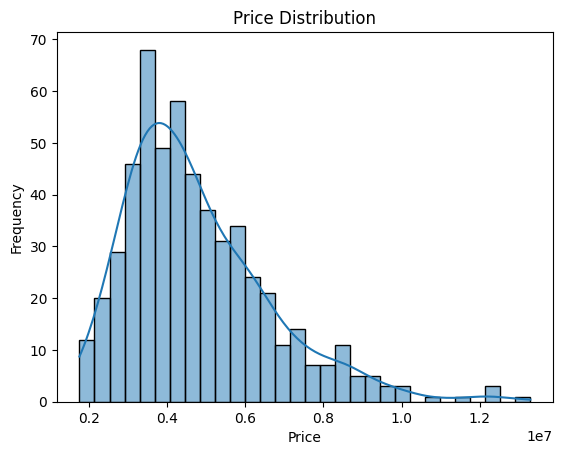

In [22]:
sns.histplot(dfcopy['price'], kde=True, bins=30)
plt.xlabel('Price')
plt.title('Price Distribution')
plt.ylabel('Frequency')
plt.show()

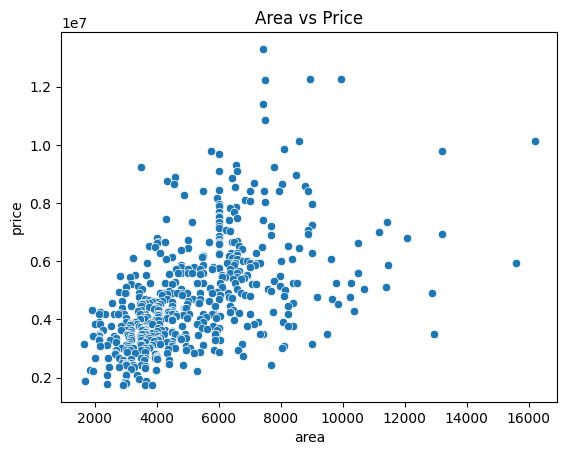

In [23]:
sns.scatterplot(x='area', y='price', data= dfcopy)
plt.title('Area vs Price')
plt.show()

# Probability Distributions, Random Variables and  Statistical inference

